# Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features.
They can accordingly manipulate the business strategy to meet the demand levels and meet the customers expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Import library

In [1]:
# import the libraries below 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import training libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
# api found online
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
#read csv file in panda dataframe
df = pd.read_csv('day.csv')

# Data understanding 

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

#### There are 730 rows and 16 columns in the data. 

In [6]:
# below command gives you basis staticstics info about each column
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check the datatypes for each columns
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
len(df) - len(df.dropna())

0

#### There are no null values in any of the columns.

# Data Cleaning

In [9]:
# Take only relevant columns from our dataframe

## First column in df represents basic indexing which can be removed.
## Second column (dteday) we can remove this column also as we already have season and month info present in other columns
## -We can remove 2 target variables out of 3, As mentioned in the question itself ( Remove casual and registered, 
## keep cnt as this is our final target variable)

In [10]:
df=df.drop(['instant','dteday','casual','registered'],axis=1)

In [11]:
## we can see that features like season, mnth, weekday and weathersit are integers,
## these should be categorical string values.

In [12]:
df.season=df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df.weathersit=df.weathersit.replace({1:'clear weather',2:'mist/cloudy weather',3:'light rain/snow',4:'heavy rain/snow'})
df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist/cloudy weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist/cloudy weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear weather,9.305237,11.46350,43.6957,12.522300,1600


#### Checking for duplicates

In [14]:
# We already check above ther are no null values in our data frame , lets check for duplicate rows also 
len(df)-len(df.drop_duplicates())

0

In [15]:
# We can see there are no duplicates also in our df

# EDA

In [16]:
# let viualize each of the columns and understand more about the data

In [17]:
# Season
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# year
df.yr.unique()
# Currently it has binary value only which represents that we have data for 2 years

array([0, 1], dtype=int64)

In [19]:
# Month 
# Again this column represent the months present in our data
print(df.mnth.value_counts())
# from below value counts we can say , we have data for almost every day for 2 years

jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64


In [20]:
# holiday 
df.holiday.value_counts()
# just by seeing the value count, we may say this column might not be important , lets test this later during model building 

0    709
1     21
Name: holiday, dtype: int64

In [21]:
# lets find the  correlation in our dataframe 
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Figure size 1152x2304 with 0 Axes>

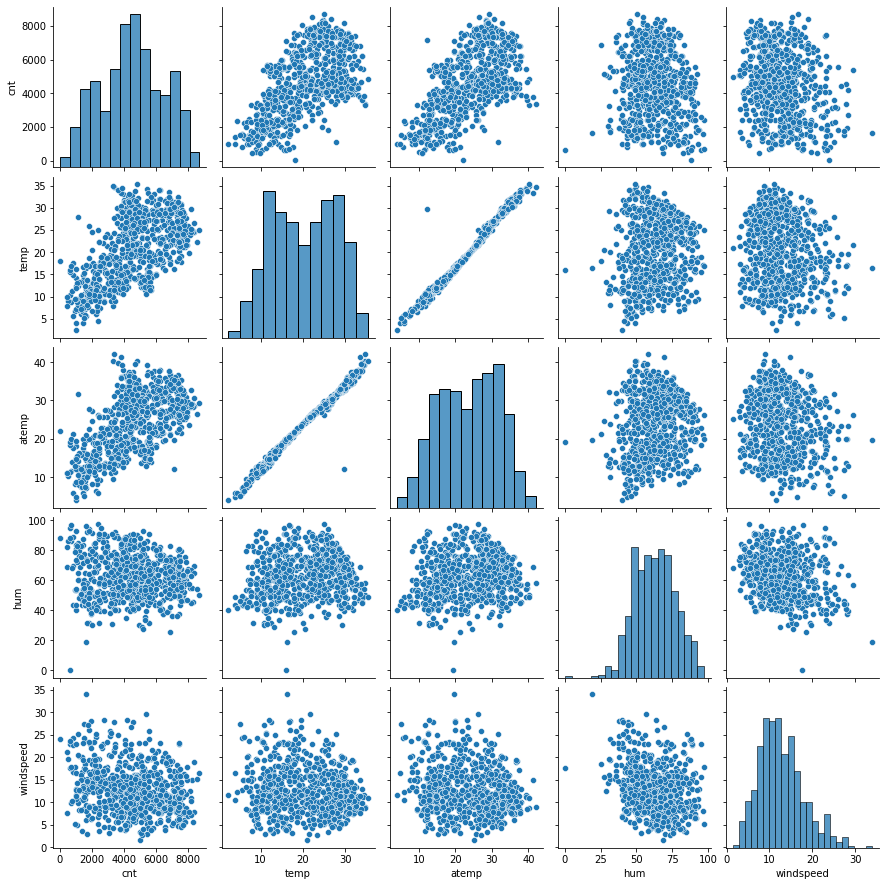

In [22]:
#Draw pair plots for continuous numeric variables using seaborn
plt.figure(figsize = (16,32))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [23]:
# from the above plot we can say,-> temp and atemp are highly co-related with each other.
## And output variable has a linear relationship with variables like temp, atemp.
# We can see that cnt is linearly increasing with temp indicating linear relation.
# Hum values are scattered around.
# Windspeed values are more scattered around.

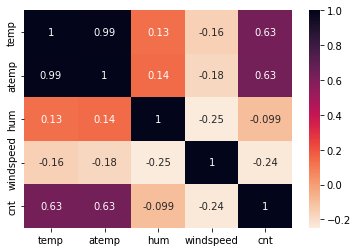

In [24]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='rocket_r', annot = True)
plt.show()

In [25]:
# Above we see that temp and atemp are highly correlated which means atemp is derived from temp.
# So We can drop atemp field

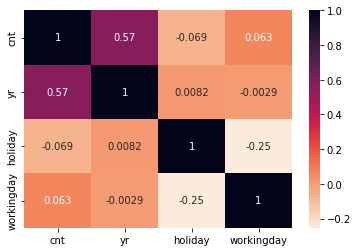

In [26]:
#Find correlation for all remaining variables also
sns.heatmap(df[['cnt','season', 'yr', 'mnth', 'holiday','workingday']].corr(), cmap="rocket_r", annot = True)
plt.show()

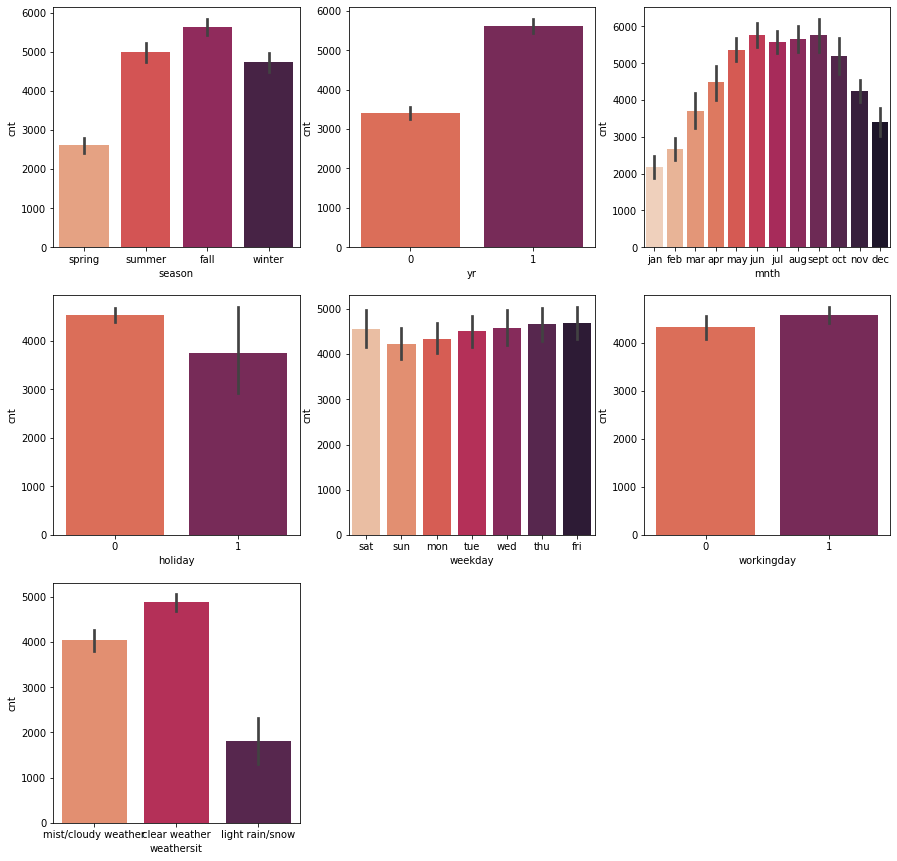

In [27]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=df, x=i[1], y='cnt', palette="rocket_r")
plt.show()

In [28]:
# Some pointer to note:

# Spring has lowest demand while fall achives highest demand
# Demand for next year is almost double from last one
# Just like from 1st graph we can see demand was more in summer and fall season , same can be interpreted from 3rd graph(months perspective).
# When there is a holiday demand has decreased very sightly but not noticable in big data.
# With respect to weekdays demand is not changing much.
# clear weathershit has highest demand

## Remove Outlier

In [29]:
# To find outlier lets do a box plot for these variables - temp,atemp,hum,windspeed

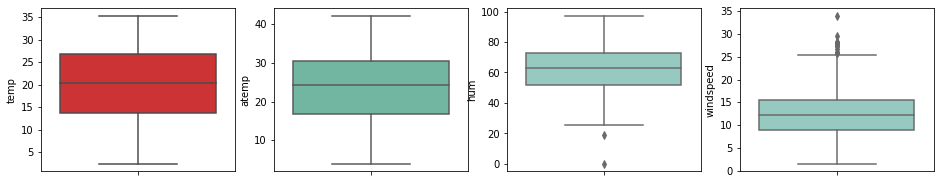

In [30]:
count = 1
input_columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16,3))
for column in input_columns:
    plt.subplot(1,4,count)
    if count==4:
        count-=1
    sns.boxplot(y=column, data=df,palette="Set"+str(count),color=".25")
    count-=-1

In [31]:
# even if ther are some outliners in windspeed , we should not remove these values because as per our use 
# case this will be an important factor which will impact our target variable.

# Data Preparation

In [32]:
# Dropping the first columns as (p-1) dummies can explain p categories.(explained in offical doc.)
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [33]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear weather', 'weathersit_light rain/snow',
       'weathersit_mist/cloudy weather'],
      dtype='object')

In [34]:

#Train Test split with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['cnt'])], df["cnt"], test_size=0.2, random_state=69)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 30), (146, 30), (584,), (146,))

In [36]:
var = ['temp','atemp','hum','windspeed']
#Use Normalized scaler to scale
scaler = MinMaxScaler()
X_train[var] = scaler.fit_transform(X_train[var])

In [37]:
#Check how the data looks like after scaling
X_train.describe()

,atemp,holiday,hum,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist/cloudy weather,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,windspeed,workingday,yr
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513906,0.030822,0.559172,0.082192,0.090753,0.092466,0.075342,0.087329,0.077055,0.092466,...,0.332192,0.143836,0.147260,0.150685,0.131849,0.147260,0.142123,0.347497,0.671233,0.506849
std,0.211427,0.172983,0.178050,0.274892,0.287504,0.289931,0.264169,0.282558,0.266907,0.289931,...,0.471403,0.351224,0.354669,0.358048,0.338617,0.354669,0.349476,0.162191,0.470168,0.500382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329388,0.000000,0.422995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229511,0.000000,0.000000
50%,0.532625,0.000000,0.554169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326928,1.000000,1.000000
75%,0.688457,0.000000,0.687998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438467,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X_train.head()

,atemp,holiday,hum,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_mist/cloudy weather,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,windspeed,workingday,yr
350,0.223544,0,0.475305,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0.455140,0,0
328,0.395893,0,0.580988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.157717,1,0
207,0.802804,0,0.274031,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.332057,1,0
130,0.589807,0,0.567180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.202548,1,0
457,0.501969,0,0.266065,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.160268,1,1


# Model Training

## Building Models using RFE and VIF approach as explained in call

In [39]:
# Start by building a basic LR model using SKLearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### lets use  RFE to start eliminating columns

In [40]:
#In total we have 30 features
len(X_train.columns)

30

In [41]:
#start by cutting down the features by using automated approach
rfe = RFE(lr,n_features_to_select=15) # lets select half of the features out of 30
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
# bleow are the top 20 columns selected by RFE
X_train.columns[rfe.support_]

Index(['atemp', 'hum', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'season_spring', 'season_winter', 'temp',
       'weathersit_light rain/snow', 'windspeed', 'workingday', 'yr'],
      dtype='object')

In [43]:
# lets find the same thing manually

In [44]:
# Found this api online to build model in our case
def model_init_api(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    temp = sm.OLS(y_train, X_train_sm).fit()
    print(temp.summary())
    return temp

In [45]:
# lets write a func to calculate VIF
def calculate_vif(input_columns):
    temp_df = X_train[input_columns]
    vif_df = pd.DataFrame()
    vif_df['Features'] = temp_df.columns
    vif_df['VIF'] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    print(vif_df.sort_values(by='VIF',ascending=False))

In [46]:
# To start eleminating columns , lets take top 10 selected by RFE
X_train_rfe = X_train[list(X_train.columns[rfe.support_])]

In [47]:
X_train_rfe.shape

(584, 15)

### build a model and check the result by taking all the columns selected by RFE

In [48]:
# build a model and check the result by taking all the columns selected by RFE
all_selected_columns = list(X_train.columns[rfe.support_])

model_init_api(all_selected_columns)
calculate_vif(all_selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     185.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.21e-207
Time:                        22:38:48   Log-Likelihood:                -4723.3
No. Observations:                 584   AIC:                             9479.
Df Residuals:                     568   BIC:                             9548.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

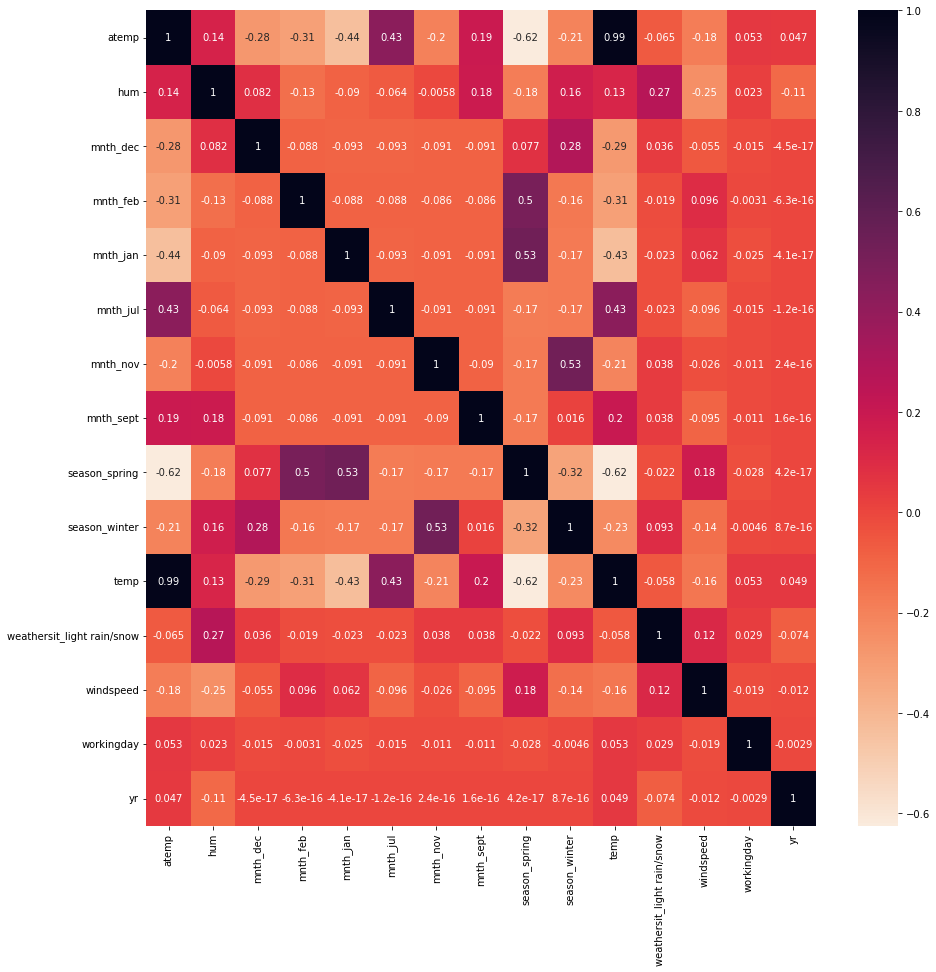

In [49]:
# Also to check impact of different features on target.
plt.figure(figsize = (15,15))
sns.heatmap(df[all_selected_columns].corr(), cmap='rocket_r', annot=True)
plt.show()

In [50]:
#from above results as expected temp and atemp are alike , so we will be removing one of this from next model
#Drop variable mnth_jan,mnth_dec,mnth_feb,mnth_nov because of its negative coefficient and is insignificant as it has high p-value

In [51]:
# build a model and after removing all the columns mentioned above
all_selected_columns =[x for x in list(X_train.columns[rfe.support_]) if x not in list(["atemp","mnth_jan","mnth_dec",
                                                                                        "mnth_feb","mnth_nov"]) ]

model_init_api(all_selected_columns)
calculate_vif(all_selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     264.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.81e-207
Time:                        22:38:50   Log-Likelihood:                -4737.8
No. Observations:                 584   AIC:                             9498.
Df Residuals:                     573   BIC:                             9546.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
#lets try to replace mnth_jul and mnth_sept with season_spring as they correlate with each other more 
# and we will try removing one of these temp or humidity and and check VIF if nothing changes then we reomve the other half
# lets go with hum first

In [53]:
all_selected_columns =[x for x in list(X_train.columns[rfe.support_]) if x not in list(["atemp","mnth_jan","mnth_dec",
                                                                                        "mnth_feb","mnth_nov",
                                                                                       "mnth_jul","mnth_sept",
                                                                                       "hum"]) ]

model_init_api(all_selected_columns)
calculate_vif(all_selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     308.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          4.53e-190
Time:                        22:38:50   Log-Likelihood:                -4787.4
No. Observations:                 584   AIC:                             9591.
Df Residuals:                     576   BIC:                             9626.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# based on the statistics I will select the last model as my final bcoz of the follwoing -
# suprisingly VIF is good here or lets say more acceptable
# and p value also close to 0 only
# R2 and Adj.R2 looks good too :)

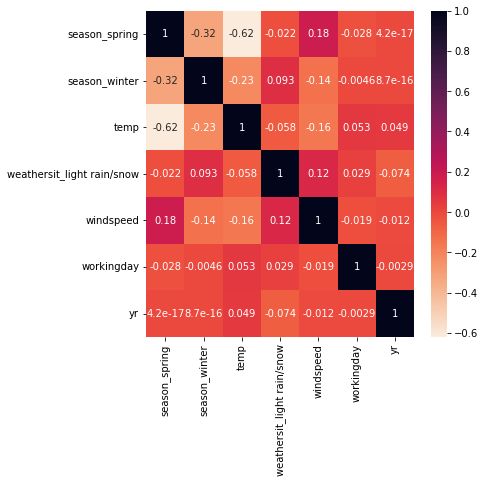

In [77]:
# Also to check impact of different features on target a final time.
plt.figure(figsize = (6,6))
sns.heatmap(df[all_selected_columns].corr(), cmap='rocket_r', annot=True)
plt.show()

## Final Model

In [55]:
final_selected_columns= all_selected_columns

In [56]:
# lets build the final model using sklearn
lr_model = LinearRegression()
lr_fit_model=lr_model.fit(X_train[final_selected_columns],y_train)

## Final Model Eval

### Residual Analysis

In [57]:
# Residual Analysis on all the final selected columns
# on training data
y_train_pred = lr_fit_model.predict(X_train[final_selected_columns])

Text(0.5, 0, 'Errors')

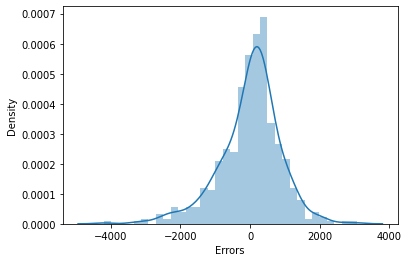

In [58]:
#visualize the errors
sns.distplot(y_train-y_train_pred)
plt.xlabel('Errors')

In [59]:
# we can see that errors are normally distributed with its mean as 0

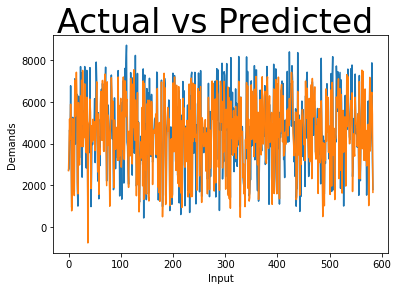

In [60]:
# Actual vs Predicted
temp = [i for i in range(0,len(X_train),1)]
plt.plot(temp,y_train)
plt.plot(temp,y_train_pred)
plt.suptitle('Actual vs Predicted', fontsize = 33)
plt.xlabel('Input')
plt.ylabel('Demands')
plt.show()

In [61]:
# we may notice above that same pattern is being followed in our actual vs predicted, our model seems ok

In [62]:
#Print R-squared Value which is also provideed in our final model
r2_score(y_train,y_train_pred)

0.7891928933305639

## Linearity Check

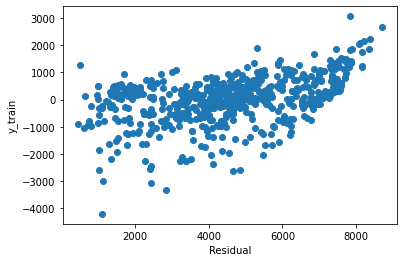

In [63]:
# scatter plot for the check
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## predicting for test set

In [64]:
#Scale variables in X_test
select_var = ['temp','windspeed','atemp','hum']

#Test data to be transformed only, no fitting
X_test[select_var] = scaler.transform(X_test[select_var])

In [65]:
#Predict on test data
y_test_pred = lr_fit_model.predict(X_test[all_selected_columns])

## Calculate R2 for test set

In [66]:
# calculate R2 between test and predicted test sets
r2_score(y_test,y_test_pred)

0.7862210932685877

In [67]:
# R2 value on test set and train set look close enough. Whihc is really good
# We can say that our model is really good even on test set

Text(0, 0.5, 'demand')

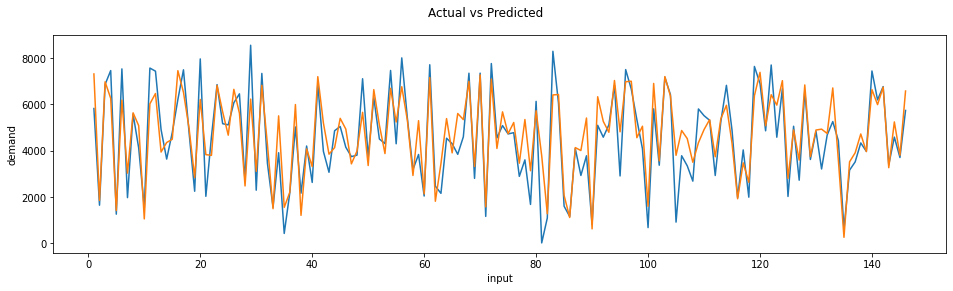

In [71]:
# visualizing pattern on test set to better understand the distribution
temp = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(16,4))
plt.plot(temp,y_test, linestyle="-")
plt.plot(temp,y_test_pred, linestyle="-")
fig.suptitle('Actual vs Predicted')
plt.xlabel('input')
plt.ylabel('demand')

In [69]:
# from above plot we may say variance is constant across the predictions

### Plot Error for test data

Text(0.5, 0, 'Errors')

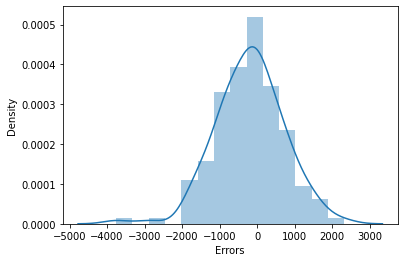

In [72]:
#visualize the errors
sns.distplot(y_test-y_test_pred)
plt.xlabel('Errors')

In [73]:
# printing final selected columns once more
all_selected_columns

['season_spring',
 'season_winter',
 'temp',
 'weathersit_light rain/snow',
 'windspeed',
 'workingday',
 'yr']

# final Comments

In [74]:
# After analysing the final model my suggestions are as follows- 
# Company should focus on expanding business during Spring and winter season.
# Based on historical data we expecte to have an increase in demand of bikes in the next year also.
# according to the statistic there will be less demand during Light rain/snow.

### Overview
#### Once the situation is normal, the industry should focus mainly on new customers and new offer to retain old customers during spring break.

# Conclusion

## Significant variables that impact the demand for bikes

- season_spring
- season_winter
- temp
- windspeed
- weathersit_light rain/snow
- windspeed
- workingday
- yr